In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# load datasset 
df_raw=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df_raw.shape

(13320, 9)

In [4]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [6]:
# exploratory data analysis 


df=df_raw.copy()  #  get the copy of raw data 

# get info of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

# observe there is huge difff between 75% and max

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


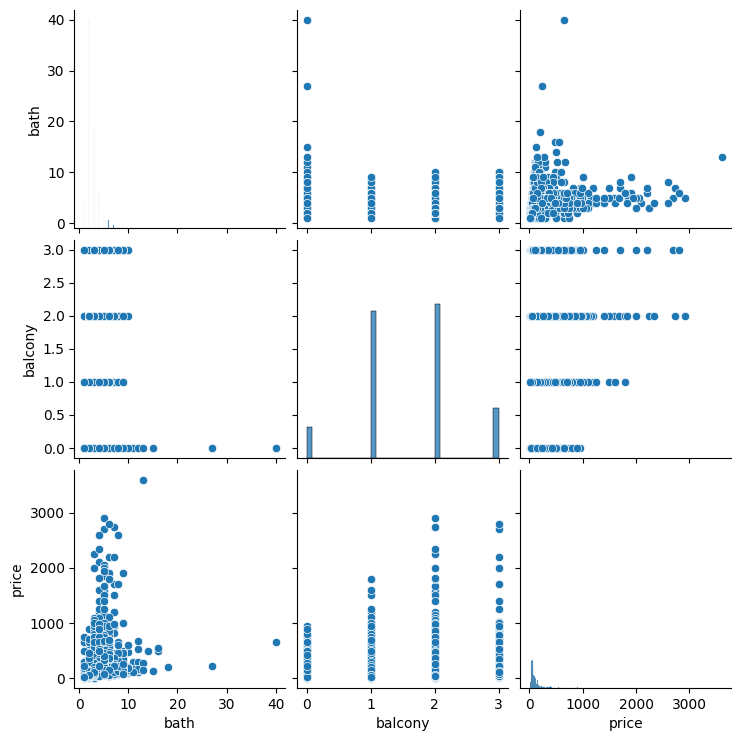

In [8]:
sns.pairplot(df)

In [9]:
# bath and proce habe slightly linear correlation with some outliers 

# value count of each feature 

def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("-----------------")

value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
-----------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
-----------------
location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64
-----------------
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547


In [ ]:
# to prepare data for ml algo 

# data cleaning 
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.isnull().mean()*100  # % of missing values

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<Axes: >

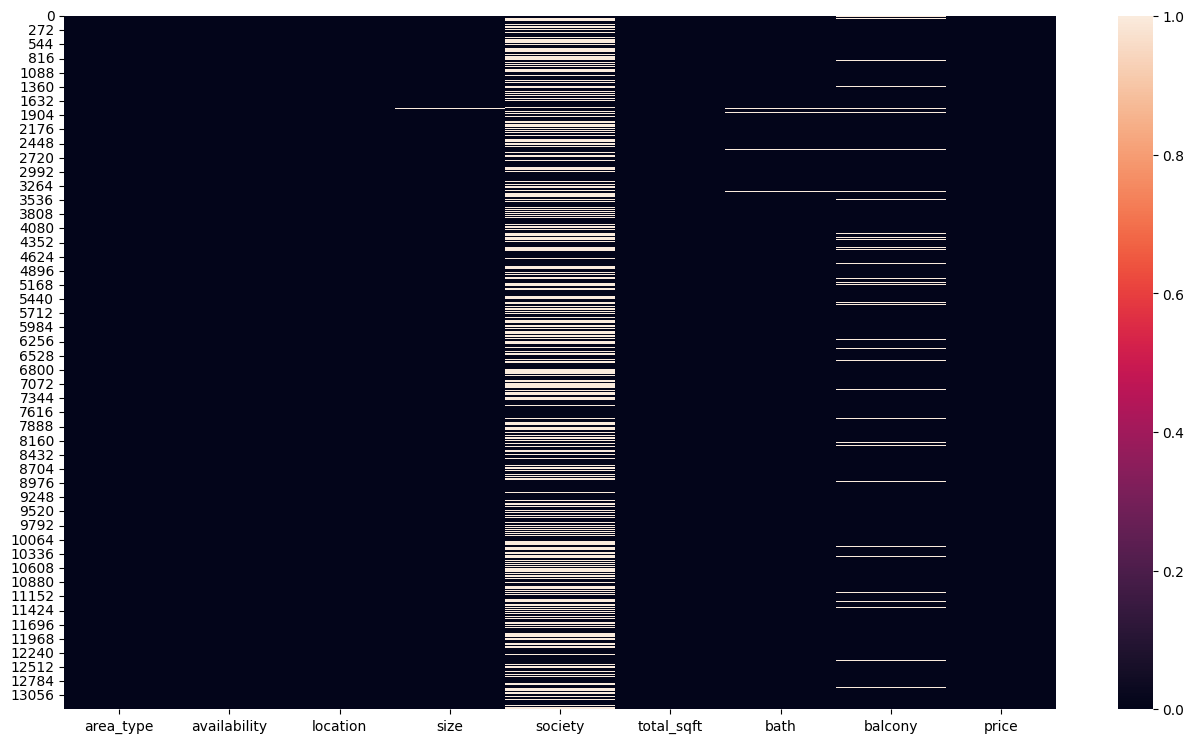

In [ ]:
# visualize missing value using heatmap to get idea where is the value missing 

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [ ]:
# Drop --------.> society feature 
# because 41.3 % missing 
df2=df.drop('society',axis='columns')
df2.shape

(13320, 8)

In [ ]:
#3 fill mean values in -------->
df2["balcony"]=df2["balcony"].fillna(df2["balcony"].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [ ]:
# drop na value rows from df2
# because there is very less % value missing 
df3=df2.dropna()
df3.shape


(13246, 8)

In [ ]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:

df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
## feature engineering 

In [ ]:
# to shaw all the columns and rows 

pd.set_option("display.max_columns",None)

pd.set_option("display.max_rows",None)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       13246 non-null  float64
 7   price         13246 non-null  float64
dtypes: float64(3), object(5)
memory usage: 931.4+ KB


In [ ]:
# convertiong total_sqft cat feature into numeric values

df3['total_sqft'].value_counts()

total_sqft
1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
1075                  66
3000                  66
1020                  63
2500                  62
1160                  60
1125                  60
1550                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1225                  48
1175          

In [ ]:
total_sqft_int=[]
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val))

    except:
        try:
            temp=[]
            temp=str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)
        except:
            total_sqft_int.append(np.nan)

In [ ]:
# reset the indez of dataframe 
df4=df3.reset_index(drop=True)


In [ ]:
# join df4 and total_srft_int list 

df5=df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [ ]:
# drop na values

df6=df5.dropna()
df6.shape

(13200, 9)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [ ]:
## working kon<< size >>>

df6["size"].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
8 Bedroom       83
7 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [ ]:
size_int=[]
for str_val in df6['size']:
    temp=[]
    temp=str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print("Noise =",str_val)

In [ ]:
df6=df6.reset_index(drop=True)

In [ ]:
# join df6 and list size_int 

df7=df6.join(pd.DataFrame({"bhk":size_int}))
df7.shape

(13200, 10)

In [ ]:
## Finding outlier and removing 

# function to create histogram and boxplot 

import scipy.stats as stats 
def diagnostic_plots(df,variable):
    # function takes a dataframe (df) and 
    # the variable of interest as argument 
    # define figure size 
    plt.figure(figsize=(16,4))

In [ ]:
num_var=["bath", "balcony","total_sqft_int","bhk","price"]
for var in num_var:
    print("************* {} ************".format(var))
    diagnostic_plots(df7,var)

************* bath ************
************* balcony ************
************* total_sqft_int ************
************* bhk ************
************* price ************


<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

In [ ]:
# we observe outlier using histogram and boxplot 
# here we consider 1 bhk required min 350   sqft are 
df7[df7['total_sqft_int']/df7['bhk']<350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [ ]:
# now we found outliers 

# if 1 bhk total_sqft are < 350 then we are going to remove them 
df8 = df7[~(df7['total_sqft_int']/df7['bhk']<350)]
df8.shape

(12106, 10)

In [ ]:
# create new feature that is price per square foot 
# it help to find the outliers 

# peice in lakh so convert into repees and then / by total_sqft_int

df8['price_per_sqft']=df8['price']*100000/df8['total_sqft_int']
df8.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\765704396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft']=df8['price']*100000/df8['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [ ]:
df8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
# here we can see huge difference bitween min and max price_per_sqft 
# min 6308.588235

# removing outliers using help of 'price per sqft' taking std and mea   location 
def remove_pps_outliers(df):

    df_out=pd.DataFrame()

    for key,subdf in df.groupby('location'):

        m=np.mean(subdf.price_per_sqft)

        st=np.std(subdf.price_per_sqft)

        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]

        df_out=pd.concat([df_out,reduced_df],ignore_index=True)

    return df_out

df9=remove_pps_outliers(df8)

df9.shape

(8888, 11)

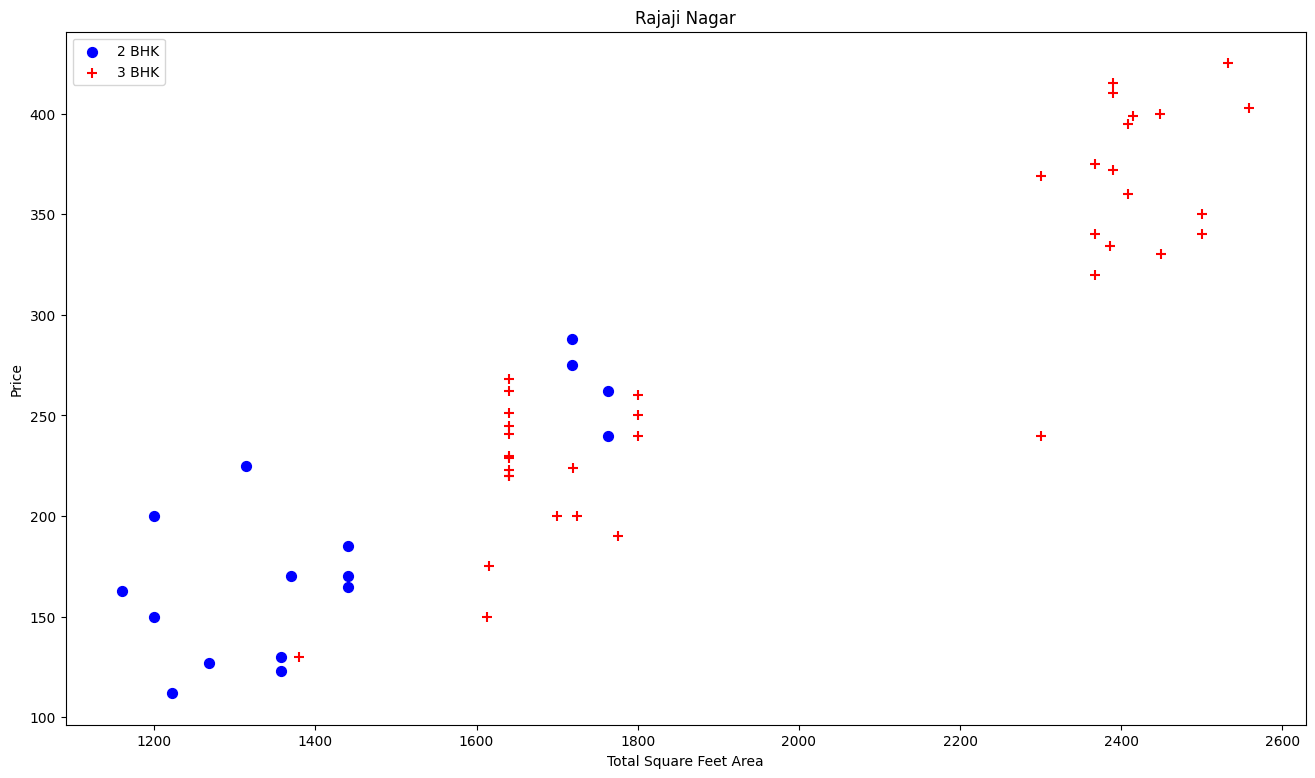

In [ ]:
def plot_scatter_chart(df,location):

    bhk2=df[(df.location==location) & (df.bhk==2)]

    bhk3=df[(df.location==location) & (df.bhk==3)]

    plt.figure(figsize=(16,9))

    plt.scatter(bhk2.total_sqft_int,bhk2.price,color='Blue',label='2 BHK',s=50)

    plt.scatter(bhk3.total_sqft_int,bhk3.price,color='Red',label='3 BHK',s=50,marker="+")

    plt.xlabel("Total Square Feet Area")

    plt.ylabel("Price")

    plt.title(location)

    plt.legend()

plot_scatter_chart(df9,"Rajaji Nagar")

In [ ]:
df9['bhk'].describe()

count    8888.000000
mean        2.542417
std         0.821946
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: bhk, dtype: float64

In [ ]:
df9.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
count,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000
mean,2.453308,1.600137,94.190787,1508.993962,2.542417,5696.436599
std,0.922971,0.779718,111.827277,898.170168,0.821946,2475.793035
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000
25%,2.000000,1.000000,49.177500,1115.000000,2.000000,4262.295082
50%,2.000000,2.000000,67.000000,1290.000000,2.000000,5176.359705
75%,3.000000,2.000000,100.000000,1650.000000,3.000000,6377.965392
max,12.000000,3.000000,2912.000000,30400.000000,10.000000,35000.000000


In [ ]:
# Remove BHK outlierss

def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]}
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                return df.drop(exclude_indices, axis='index')
df10=remove_bhk_outliers(df9) 
df10.shape      

(8886, 11)

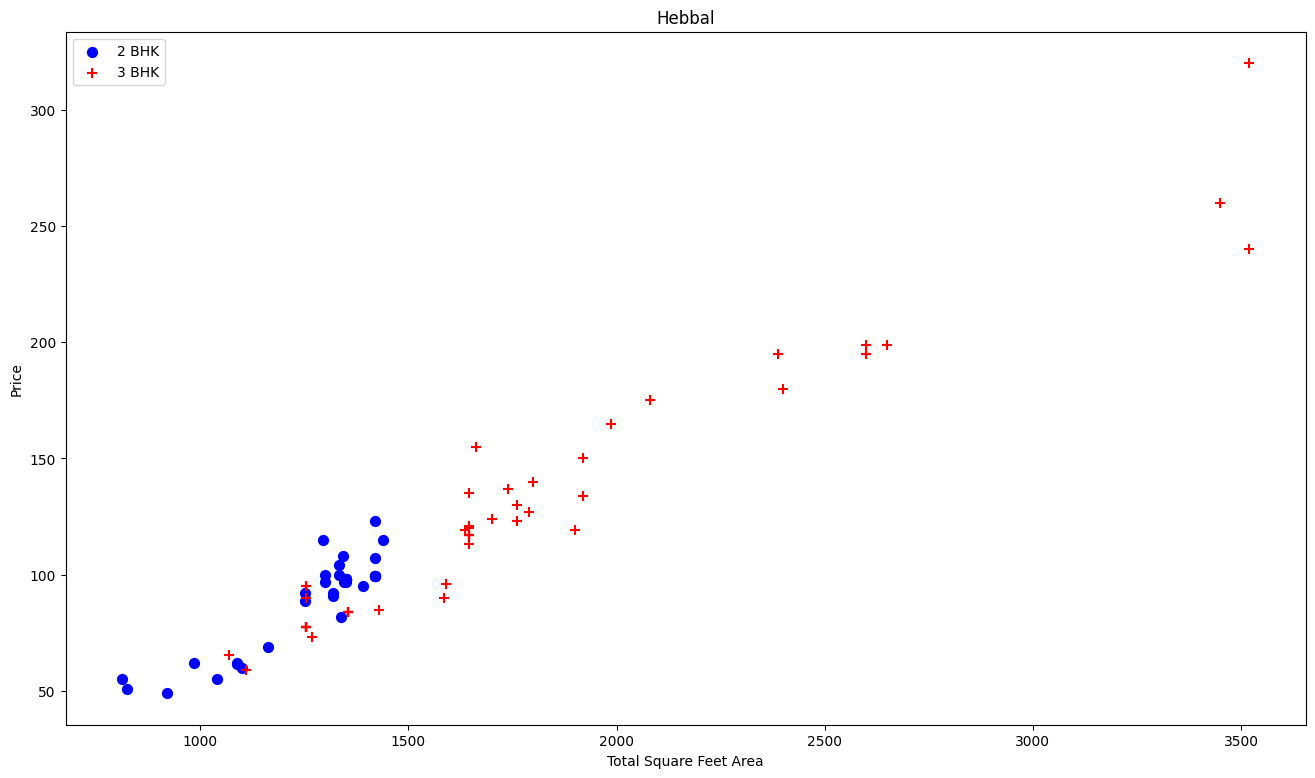

In [ ]:
plot_scatter_chart(df10,"Hebbal")

In [ ]:
#in below scatter plot most of the red dataa point remove from blue points 

In [ ]:
# remove outliers using the help of bath features 

df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [ ]:
df10[df10.bath>df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


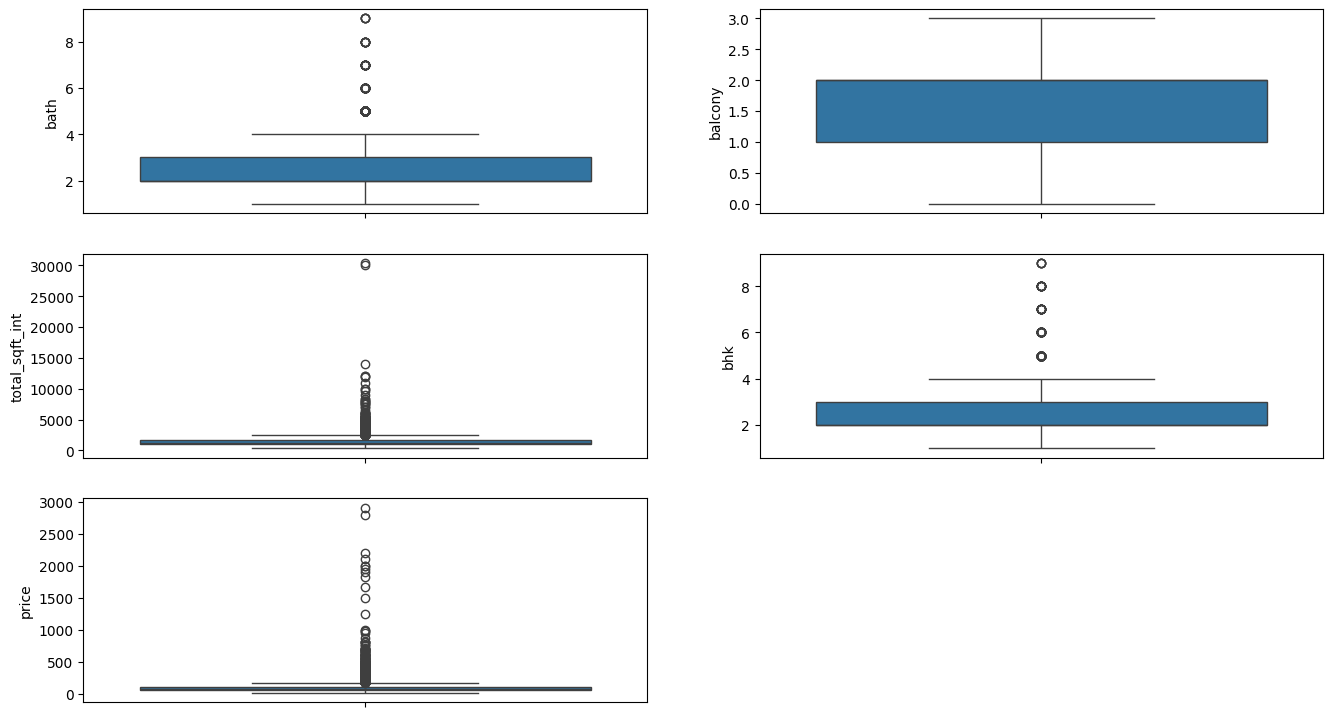

In [ ]:
# here we are consideing data only total no. bathroom =bhk+1
df10[df10.bath>df10.bhk+2]
df11=df10[df10.bath<df10.bhk+2]
df11.shape

plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df11[var])
df11.head()

In [ ]:

df12=df11.drop(['area_type','availability','location','size','total_sqft'],axis=1)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
X = df12.drop('price', axis=1)
y = df12['price']
X.columns

Index(['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft'], dtype='object')

In [ ]:

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
import numpy as np
bath=3 
balcony=2 
total_sqft_int=5000
bhk=3 
price_per_sqft=500
x_input = np.array([[bath,balcony,total_sqft_int,bhk,price_per_sqft]])
predicted_price = model.predict(x_input)[0]

print(f"Estimated Price: ₹ {predicted_price:.2f} lakhs")


Estimated Price: ₹ 261.52 lakhs


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
